In [56]:
from matplotlib import pyplot as plt
import numpy as np
import mapper
import graphviz
%matplotlib inline

In [155]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

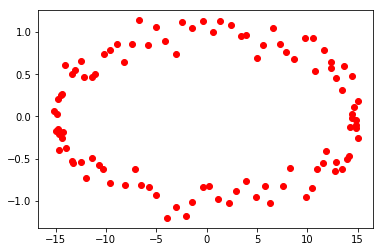

In [215]:
t = np.linspace(-10, 10, 100) * 2 * 3.14
x = np.sin(t) * 15
y = np.cos(t)

circle = np.array((x, y)).transpose() + (np.random.rand(100, 2) - 0.5) /2
plt.plot(*circle.transpose(), "ro")

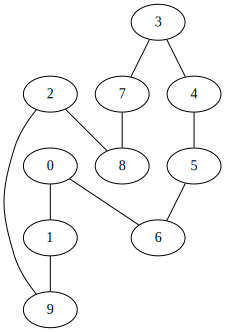

In [214]:
flt = y.reshape((-1, 1))
cov = mapper.cover.balanced_cover_1d(6, 40)
with Capturing() as output:
    mappered = mapper.mapper(circle, flt, cov, mapper.cutoff.histogram(6))

g = graphviz.Graph()
for (a,) in mappered.simplices.simplices[0].keys():
    g.node(str(a))

for ((a, b), weight) in mappered.simplices.simplices[1].items():
    g.edge(str(a), str(b), weight=str(weight))
g

In [103]:
# http://stackoverflow.com/questions/16571150/how-to-capture-stdout-output-from-a-python-function-call

from io import StringIO
import sys

class Capturing(list):
    def __enter__(self):
        self._stdout = sys.stdout
        sys.stdout = self._stringio = StringIO()
        return self
    def __exit__(self, *args):
        self.extend(self._stringio.getvalue().splitlines())
        del self._stringio    # free up some memory
        sys.stdout = self._stdout

In [110]:
flt.shape

(100, 1)

In [208]:
output

['Number of CPU cores present: 8',
 'Start Mapper thread.',
 'Start Mapper thread.',
 'Start Mapper thread.',
 'Start Mapper thread.',
 'Start Mapper thread.',
 'Start Mapper thread.',
 'Start Mapper thread.',
 'Start Mapper thread.',
 'Mapper: Filter range in dimension 0: [-1.00, 1.00]',
 'Mapper: Cover: Balanced cover with 6 intervals and 40.0% overlap.',
 'Mapper: Clustering: Single linkage clustering',
 'Mapper: Cutoff: Histogram method with 6 bins',
 'Level: (0,)',
 'Level: (1,)',
 'Level: (2,)',
 'Level: (3,)',
 'Level: (4,)',
 'Level: (5,)',
 'Filter level (0,) has 25 points.',
 'Filter level (1,) has 25 points.',
 'Filter level (2,) has 25 points.',
 'Filter level (3,) has 25 points.',
 'Filter level (4,) has 25 points.',
 'Filter level (5,) has 25 points.',
 'There are 9 nodes.',
 'Generate the simplicial complex.',
 'Collect simplices of dimension 1:',
 'There are 9 simplices of dimension 1.',
 'Collect simplices of dimension 2:',
 'There are 0 simplices of dimension 2.',
 'D